# Machine Learning Engineer Nanodegree
## Capstone Project
<br>Yun Zhang  
<br>May 28th, 2016

In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
from scipy.stats import norm
#color = sns.color_palette()
%matplotlib inline

In [57]:
# get insight on the log error at different time
# exploratory analysis for the transaction data
transaction=pd.read_csv('train_2016.csv', parse_dates=["transactiondate"]);

In [58]:
transaction.shape

(90811, 3)

In [59]:
# get the size of the transaction data
(M,N)=transaction.shape
print("There are",M,"houses have been sold during 2016.")

There are 90811 houses have been sold during 2016.


In [60]:
# number of houses which has been sold for more than one time
print('There are',len(transaction['parcelid'].unique()),'unique properties have been sold during 2016,\n and there are',
     M-len(transaction['parcelid'].unique()),'houses have been sold for more than once.')
# get the sold times distribution for all houses
property_sold_times=transaction['parcelid'].value_counts()
property_sold_times.value_counts()

There are 90682 unique properties have been sold during 2016,
 and there are 129 houses have been sold for more than once.


1    90554
2      127
3        1
Name: parcelid, dtype: int64

In [61]:
# log error for one property that sold for three times
property_id_sold_3_times=property_sold_times[property_sold_times==3].index.tolist()
transaction[transaction['parcelid'].apply(lambda x: True if x in property_id_sold_3_times else False)]

,parcelid,logerror,transactiondate
56145,11842707,-0.0284,2016-07-14
68924,11842707,0.0573,2016-08-22
81114,11842707,0.2078,2016-09-29


In [62]:
# log error variation for properties that sold for more than 2 times
property_id_sold_2_times=property_sold_times[property_sold_times==2].index.tolist()
property_id_sold_2_times=pd.DataFrame(property_id_sold_2_times,columns=['parcelid'])
property_id_sold_2_times['1st']=pd.Series(np.zeros(127))
property_id_sold_2_times['2nd']=pd.Series(np.zeros(127))
property_id_sold_2_times['1st'].astype(float,inplace=True)
property_id_sold_2_times['2nd'].astype(float,inplace=True)
property_id_sold_2_times.set_index('parcelid',inplace=True)
for x in property_id_sold_2_times.index.tolist():
    tmp=transaction[transaction['parcelid']==x].logerror.values.tolist()
    property_id_sold_2_times['1st'].loc[x]=tmp[0]
    property_id_sold_2_times['2nd'].loc[x]=tmp[1]
property_id_sold_2_times['diff']=property_id_sold_2_times['2nd']-property_id_sold_2_times['1st']
print('The same properties that are sold at different time have different log error, which indicates time is a factor of log error and',
     'the original algorithm from Zillow has errors in representation in Time')
property_id_sold_2_times.head(10)

The same properties that are sold at different time have different log error, which indicates time is a factor of log error and the original algorithm from Zillow has errors in representation in Time


,1st,2nd,diff
parcelid,,,
11729067,-0.3798,-0.3581,0.0217
12032773,-0.0151,0.0208,0.0359
14678446,-0.0460,-0.0111,0.0349
12596069,0.0526,0.0686,0.0160
11633771,-0.0305,0.0208,0.0513
11146377,-0.0419,-0.0171,0.0248
14316410,-0.7215,-0.0651,0.6564
12584665,0.2829,0.0478,-0.2351
11863325,0.1089,0.1947,0.0858


In [63]:
# extract month day year data from date
transaction['sale_month']=transaction['transactiondate'].apply(lambda x: (x.to_datetime()).month)
transaction['sale_day']=transaction['transactiondate'].apply(lambda x: (x.to_datetime()).day)
transaction['sale_year']=transaction['transactiondate'].apply(lambda x: (x.to_datetime()).year)

/Users/zyaj/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:2294: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  mapped = lib.map_infer(values, f, convert=convert_dtype)


More transactions happens between April to September. The number of transactions obviously decreases in the holiday season. The reason is that a lot of transaction data between October and Decemember is used as the test data.


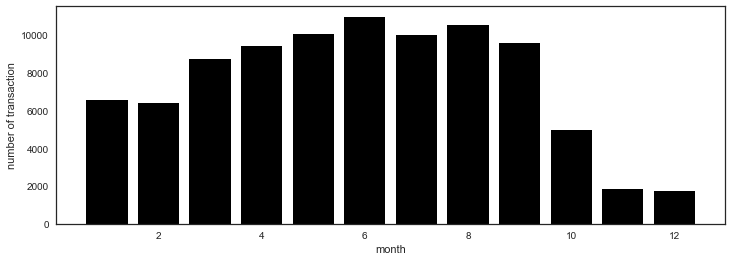

In [64]:
# distribution number of transactions 
plt.figure(figsize=(12,4))
plt.bar(range(1,13),(transaction.groupby('sale_month').count())['parcelid'],color='k')
plt.xlabel('month')
plt.ylabel('number of transaction')
print("More transactions happens between April to September.",
      "The number of transactions obviously decreases in the holiday season.",
     'The reason is that a lot of transaction data between October and Decemember is used as the test data.')
plt.savefig('num-sold-vs-month.eps',bbox_inches='tight')

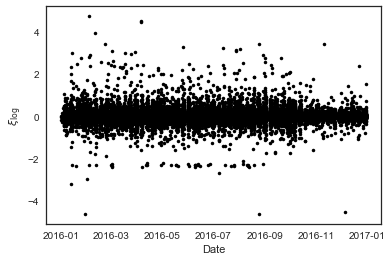

In [65]:
# plot the all log error within 2016
h=plt.plot_date(transaction['transactiondate'].apply(dates.date2num),transaction['logerror'],'k.')
plt.xlabel('Date')
plt.ylabel(r'$\xi_{\log}$')
plt.savefig('error-vs-sold-date.eps',bbox_inches='tight')

Based on the mean log error, April to August has relative low error. However, the mean log error is not the best way, since the mean absolute error does not indicate similar pattern of variation and indicates that the log error along the whole year does not vary obviously.


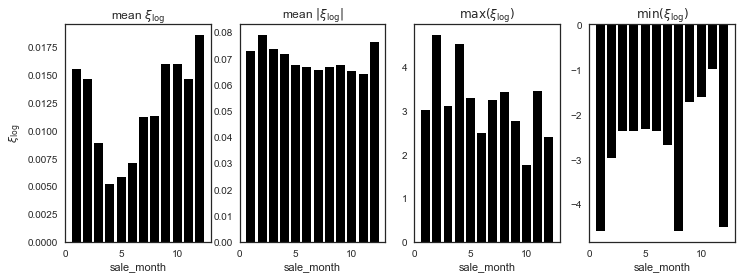

In [66]:
# plot monthly mean, absolute mean, max, and min error
transaction['sale_month'].astype(int,inplace=True)
plt.figure(figsize=(12,4))
plt.subplot(1,4,1)
plt.bar(range(1,13),(transaction[['logerror','sale_month']].groupby('sale_month').mean()).logerror.tolist(),color='k')
plt.xlabel('sale_month')
plt.ylabel(r'$\xi_{\log}$')
plt.title(r'mean $\xi_{\log}$')
plt.subplot(1,4,2)
plt.bar(range(1,13),((transaction[['logerror','sale_month']].abs()).groupby('sale_month').mean()).logerror.tolist(),color='k')
plt.xlabel('sale_month')
plt.title(r'mean $|\xi_{\log}|$')
plt.subplot(1,4,3)
plt.bar(range(1,13),(transaction[['logerror','sale_month']].groupby('sale_month').max()).logerror,color='k')
plt.xlabel('sale_month')
plt.title(r'$\max(\xi_{\log})$')
plt.subplot(1,4,4)
plt.bar(range(1,13),(transaction[['logerror','sale_month']].groupby('sale_month').min()).logerror,color='k')
plt.xlabel('sale_month')
plt.title(r'$\min(\xi_{\log})$')
print('Based on the mean log error, April to August has relative low error.',
      'However, the mean log error is not the best way, since the mean absolute error does not indicate similar',
      'pattern of variation and indicates that the log error along the whole year does not vary obviously.')
plt.savefig('error-vs-month.eps',bbox_inches='tight')

The distribution of log error is not pure normal distibution.


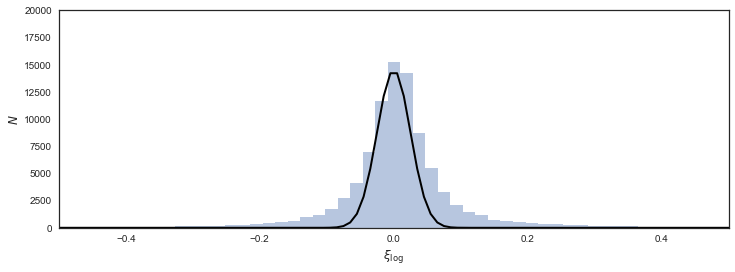

In [67]:
# plot histogram of log error
ulimit = np.percentile(transaction.logerror.values, 99)
llimit = np.percentile(transaction.logerror.values, 1)
#transaction['logerror'].loc[transaction['logerror']>ulimit] = ulimit
#transaction['logerror'].loc[transaction['logerror']<llimit] = llimit

plt.figure(figsize=(12,4))
sns.distplot(transaction.logerror.values, bins=500, kde=False)
plt.xlabel(r'$\xi_{\log}$', fontsize=12)
mu, std = norm.fit(transaction.logerror.values)
xmin,xmax=plt.xlim()
x = np.linspace(-5,5,1000)
p = norm.pdf(x, 0, 0.025)
plt.plot(x, p*(x[1]-x[0])*90811, 'k', linewidth=2)
plt.axis([-0.5,0.5,0,20000])
plt.ylabel(r'$N$', fontsize=12)
print("The distribution of log error is not pure normal distibution.")
plt.savefig('hist-error.eps',bbox_inches='tight')

The shape of the variation of log error within each month is not obvious to indicate difference in months. But the error is bigger in June, July and October.


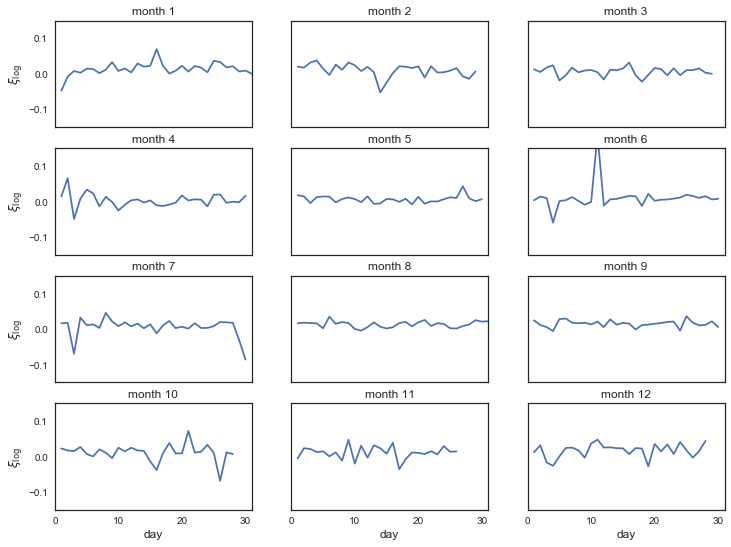

In [68]:
# plot log error distribution for each month
plt.figure(figsize=(12,9))
for i in range(1,13):
    ax=plt.subplot(4,3,i)
    tmp=transaction[transaction['sale_month']==i]
    tmp=tmp[['logerror','sale_day']].groupby('sale_day').mean()
    plt.plot(range(1,len(tmp)+1),tmp)
    plt.axis([0,31,-0.15,0.15])
    if((i!=1) & (i!=4) & (i!=7) & (i!=10)):
        ax.set_yticklabels([])
    if((i!=10) & (i!=11) & (i!=12)):
        ax.set_xticklabels([])
    plt.title('month '+str(i),fontsize=12)
    if((i==10) | (i==11) | (i==12)):
        ax.set_xlabel('day',fontsize=12)
    if((i==1) | (i==4) | (i==7) | (i==10)):
        ax.set_ylabel(r'$\xi_{\log}$',fontsize=12) 
print("The shape of the variation of log error within each month is not obvious to indicate difference in months.",
      "But the error is bigger in June, July and October.")
plt.savefig('error-variation-different-month.eps',bbox_inches='tight')

In [69]:
# the properties data proprocessing
properties_2016=pd.read_csv('properties_2016.csv',low_memory=False);

In [70]:
properties_2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [71]:
# categorize features
id_feature=['airconditioningtypeid','architecturalstyletypeid','buildingclasstypeid',
           'buildingqualitytypeid','decktypeid','hashottuborspa','heatingorsystemtypeid',
           'pooltypeid10','pooltypeid2','pooltypeid7','propertylandusetypeid',
            'storytypeid','typeconstructiontypeid','fireplaceflag','taxdelinquencyflag',
            'taxdelinquencyyear']
cnt_feature=['bathroomcnt','bedroomcnt','calculatedbathnbr','fireplacecnt','fullbathcnt',
            'garagecarcnt','garagetotalsqft','poolcnt','roomcnt','threequarterbathnbr',
            'unitcnt','yearbuilt','numberofstories','assessmentyear']
size_feature=['basementsqft','finishedfloor1squarefeet','calculatedfinishedsquarefeet',
             'finishedsquarefeet12','finishedsquarefeet13','finishedsquarefeet15',
              'finishedsquarefeet50','finishedsquarefeet6','lotsizesquarefeet',
             'poolsizesum','yardbuildingsqft17','yardbuildingsqft26','structuretaxvaluedollarcnt','taxvaluedollarcnt',
             'landtaxvaluedollarcnt','taxamount','latitude','longitude']
location_feature=['fips','propertycountylandusecode','rawcensustractandblock',
                 'regionidcity','regionidcounty','regionidneighborhood','regionidzip','censustractandblock']
str_feature=['propertyzoningdesc','propertycountylandusecode']

In [72]:
# data type analysis
dtype_df = properties_2016.dtypes.reset_index()
dtype_df.columns = ["Feature", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Feature
0,int64,1
1,float64,52
2,object,5


In [73]:
# feature as object
dtype_df[dtype_df['Column Type']=='object']['Feature']

22               hashottuborspa
32    propertycountylandusecode
34           propertyzoningdesc
49                fireplaceflag
55           taxdelinquencyflag
Name: Feature, dtype: object

In [74]:
# value count for object features
print(properties_2016['hashottuborspa'].value_counts())
print(properties_2016['fireplaceflag'].value_counts())
print(properties_2016['taxdelinquencyflag'].value_counts())
print("Features hashottuborspa,fireplaceflag and taxdelinquencyflag only have one valid values.",
      "propertycountylandusecode and propertyzoningdesc are all strings. All the five columns will be droped.")

True    69014
Name: hashottuborspa, dtype: int64
True    5163
Name: fireplaceflag, dtype: int64
Y    56462
Name: taxdelinquencyflag, dtype: int64
Features hashottuborspa,fireplaceflag and taxdelinquencyflag only have one valid values. propertycountylandusecode and propertyzoningdesc are all strings. All the five columns will be droped.


In [75]:
# drop the five object columns
properties_2016.drop(dtype_df[dtype_df['Column Type']=='object']['Feature'].values.tolist(),axis=1,inplace=True)

In [76]:
properties_2016.shape

(2985217, 53)

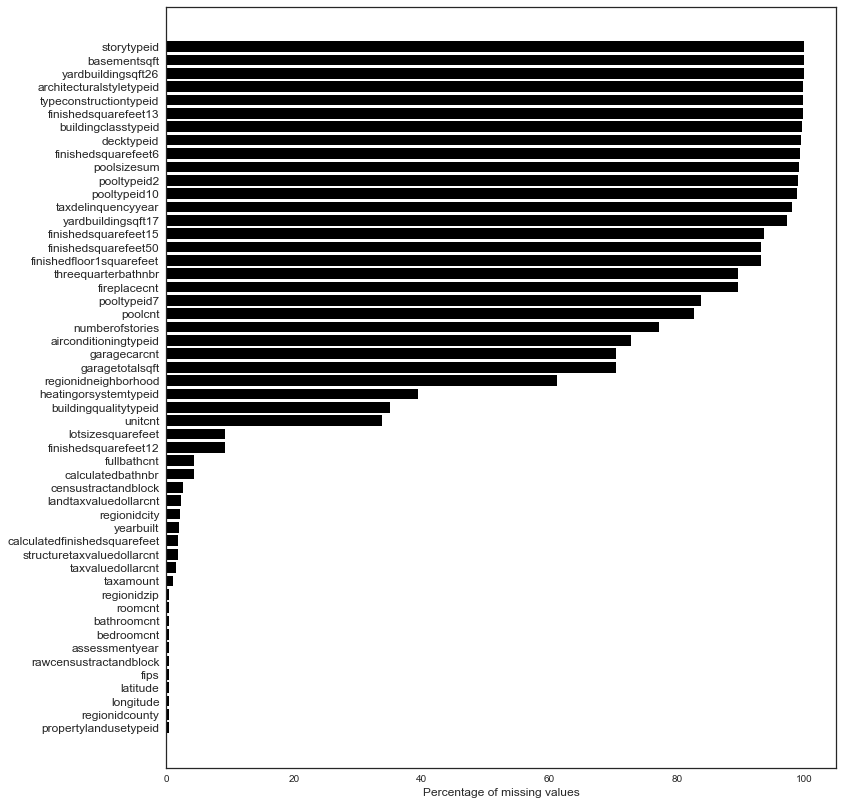

In [77]:
# check the missing percentage
missing_df = properties_2016.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,14))
rects = ax.barh(ind, missing_df.missing_count.values/2985217*100, color='k')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal',fontsize=12)
ax.set_xlabel("Percentage of missing values",fontsize=12)
#ax.set_title("Number of missing values in each column",fontsize=14)
plt.savefig('missing-value.eps',bbox_inches='tight')

In [78]:
# missing rate of the data
missing_df['missing_rate']=missing_df['missing_count']/2985217
cutoff=0.9
print(missing_df[missing_df.missing_rate<cutoff].shape)
print('There are only',missing_df[missing_df.missing_rate<cutoff].shape[0],'features of which the percentage of missing values is less than',cutoff*100,'%.')
missing_df[(missing_df.missing_rate<cutoff)].column_name.values

(35, 3)
There are only 35 features of which the percentage of missing values is less than 90.0 %.


array(['propertylandusetypeid', 'regionidcounty', 'longitude', 'latitude',
       'fips', 'rawcensustractandblock', 'assessmentyear', 'bedroomcnt',
       'bathroomcnt', 'roomcnt', 'regionidzip', 'taxamount',
       'taxvaluedollarcnt', 'structuretaxvaluedollarcnt',
       'calculatedfinishedsquarefeet', 'yearbuilt', 'regionidcity',
       'landtaxvaluedollarcnt', 'censustractandblock', 'calculatedbathnbr',
       'fullbathcnt', 'finishedsquarefeet12', 'lotsizesquarefeet',
       'unitcnt', 'buildingqualitytypeid', 'heatingorsystemtypeid',
       'regionidneighborhood', 'garagetotalsqft', 'garagecarcnt',
       'airconditioningtypeid', 'numberofstories', 'poolcnt',
       'pooltypeid7', 'fireplacecnt', 'threequarterbathnbr'], dtype=object)

In [79]:
# drop feature missing rate>0.9
properties_2016.drop(missing_df[(missing_df.missing_rate>=cutoff)].column_name.values.tolist(),
                    axis=1,inplace=True)

In [80]:
# fill missing values
# for id_feature, fill the missing values with most frequent value
# for cnt_feature, fill the missing values with median value
# for size_feature, fill the missing values with mean values
# for location_feature, fill the missing values with the nearest values
# categorize the left feature
feature_left=properties_2016.columns.tolist()
id_feature_left=list()
cnt_feature_left=list()
size_feature_left=list()
location_feature_left=list()
for x in feature_left:
    if x in id_feature:
        id_feature_left.append(x)
    elif x in cnt_feature:
        cnt_feature_left.append(x)
    elif x in size_feature:
        size_feature_left.append(x)
    elif x in location_feature:
        location_feature_left.append(x)

# fill missing values
# for id_feature, fill the missing values with most frequent value
# for cnt_feature, fill the missing values with median value
# for size_feature, fill the missing values with mean values
# for location_feature, fill the missing values with the nearest values
fill_missing_value=dict()
# for id_feature
for x in id_feature_left:
    fill_missing_value[x]=0#properties_2016[x].value_counts().index.tolist()[0]
# for cnt_feature
for x in cnt_feature_left:
    fill_missing_value[x]=properties_2016[x].median()
# for size_feature
for x in size_feature_left:
    fill_missing_value[x]=properties_2016[x].mean()
# for size_feature
for x in location_feature_left:
    fill_missing_value[x]=0#properties_2016[x].value_counts().index.tolist()[0]
for x in fill_missing_value:
    properties_2016[x].fillna(fill_missing_value[x],inplace=True)

In [81]:
# for location_feature
# regionidcounty and fips is the same to represent the county keep fips
# censustractandblock is drop as to be the same as rawcensustractandblock.
# regionidneighborhood >60% missing rate is droped
#properties_2016.drop(['regionidcounty','regionidneighborhood','censustractandblock'],axis=1,inplace=True)
# the maximum missing rate for the left location feature is 2% maximum. drop the rows with
# missing values
#properties_2016.dropna(axis=0,how='any',inplace=True)
#properties_2016.fillna(0,inplace=True)

In [82]:
# divide 1000000 for longitude and latitude
#properties_2016['longitude']=properties_2016['longitude']/1000000;
#properties_2016['latitude']=properties_2016['latitude']/1000000;

In [83]:
# add new features
# 1. tax per living area = tax amount/calculatedfinishedsquarefeet
# 2. tax per living area2 =tax amount/finishedsquarefeet12
# 3. tax per lot size=taxamount/lotsizesquarefeet
properties_2016['tax_per_liv_area']=properties_2016['taxamount']/properties_2016['calculatedfinishedsquarefeet'];
properties_2016['tax_per_liv_area2']=properties_2016['taxamount']/properties_2016['finishedsquarefeet12'];
properties_2016['tax_per_lot_size']=properties_2016['taxamount']/properties_2016['lotsizesquarefeet'];

In [84]:
# achieve data with transaction information
transaction.drop(['transactiondate','sale_year','sale_day'],axis=1,inplace=True)
train_df=transaction.merge(properties_2016,on='parcelid',how='left')
train_df.head(5)

,parcelid,logerror,sale_month,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,tax_per_liv_area,tax_per_liv_area2,tax_per_lot_size
0,11016594,0.0276,1,1.0,2.0,3.0,4.0,2.0,1684.0,1684.0,...,1.0,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13,3.999929,3.999929,0.894777
1,14366692,-0.1684,1,0.0,3.5,4.0,0.0,3.5,2263.0,2263.0,...,1.0,346458.0,585529.0,2015.0,239071.0,10153.02,0.000000e+00,4.486531,4.486531,2.786994
2,12098116,-0.0040,1,1.0,3.0,2.0,4.0,3.0,2217.0,2217.0,...,1.0,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13,5.180189,5.180189,1.005382
3,12643413,0.0218,1,1.0,2.0,2.0,4.0,2.0,839.0,839.0,...,1.0,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13,3.633778,3.633778,0.043025
4,14432541,-0.0050,1,0.0,2.5,4.0,0.0,2.5,2283.0,2283.0,...,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13,2.404275,2.404275,0.914827


In [85]:
# drop missing value which indicates these properties have no complete location information
train_df.dropna(axis=0,how='any',inplace=True)
print((len(transaction)-len(train_df))/len(transaction)*100,'% data has been removed due to the missing',
     'location information.')

0.0 % data has been removed due to the missing location information.


In [86]:
# assessmentyear only has one value, so it will be dropped
#print(properties_2016['assessmentyear'].value_counts())
#train_df.drop('assessmentyear',axis=1,inplace=True)

In [87]:
# set parcel id as index
train_df.set_index('parcelid',inplace=True)

In [88]:
# check the data type
train_df.dtypes

logerror                        float64
sale_month                        int64
airconditioningtypeid           float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
poolcnt                         float64
pooltypeid7                     float64
propertylandusetypeid           float64
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidneighborhood            float64


In [89]:
# finish data preprocessing
train_df.head(5)

,logerror,sale_month,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,tax_per_liv_area,tax_per_liv_area2,tax_per_lot_size
parcelid,,,,,,,,,,,,,,,,,,,,,
11016594,0.0276,1,1.0,2.0,3.0,4.0,2.0,1684.0,1684.0,6037.0,...,1.0,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13,3.999929,3.999929,0.894777
14366692,-0.1684,1,0.0,3.5,4.0,0.0,3.5,2263.0,2263.0,6059.0,...,1.0,346458.0,585529.0,2015.0,239071.0,10153.02,0.000000e+00,4.486531,4.486531,2.786994
12098116,-0.0040,1,1.0,3.0,2.0,4.0,3.0,2217.0,2217.0,6037.0,...,1.0,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13,5.180189,5.180189,1.005382
12643413,0.0218,1,1.0,2.0,2.0,4.0,2.0,839.0,839.0,6037.0,...,1.0,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13,3.633778,3.633778,0.043025
14432541,-0.0050,1,0.0,2.5,4.0,0.0,2.5,2283.0,2283.0,6059.0,...,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13,2.404275,2.404275,0.914827


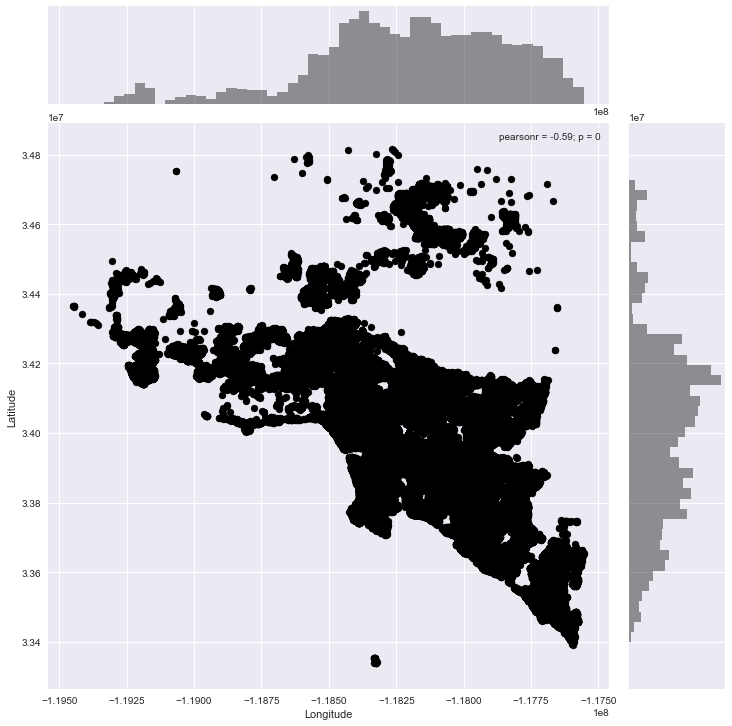

In [35]:
# exploratory analysis
# location distribution
plt.figure(figsize=(12,12))
fig=sns.jointplot(x=train_df.longitude.values, y=train_df.latitude.values, size=10,color='k')
fig.set_axis_labels('Longitude','Latitude')
#plt.colorbar(orientation="vertical",fraction=0.07)
plt.show()
plt.savefig('number-distribution-long-lat.eps',bbox_inches='tight')

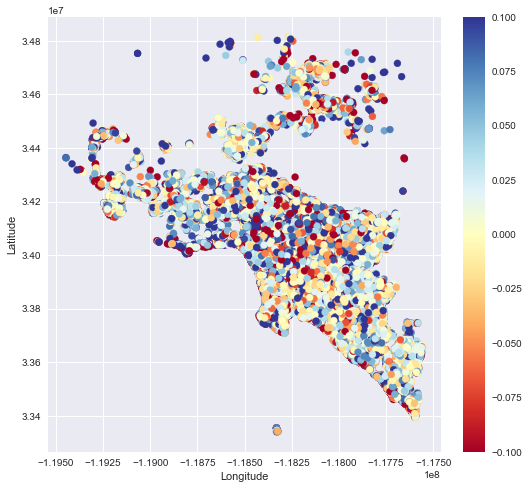

In [36]:
# location distribution vs log error
plt.figure(figsize=(8,8))
plt.scatter(train_df.longitude.values,
            train_df.latitude.values, c=train_df.logerror.values,cmap='RdYlBu')
plt.clim([-0.1,0.1])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(fraction=0.07)
plt.savefig('error-long-lat.eps',bbox_inches='tight')

There is no obvious relationship between long/lat and log error.


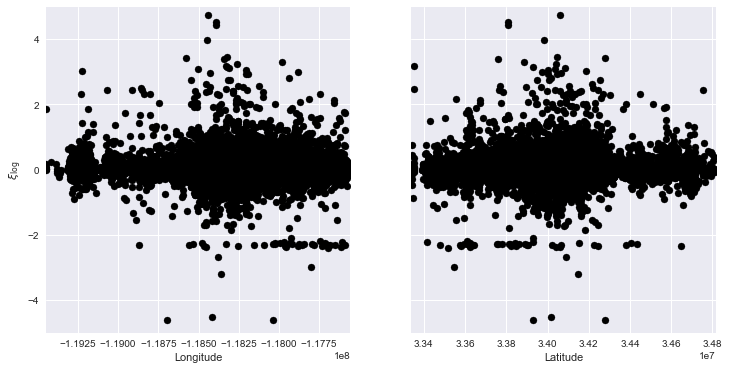

In [37]:
# plot latitude and longitude vs. log error
plt.figure(figsize=(12,6))
ax=plt.subplot(1,2,1)
plt.scatter(train_df['longitude'],train_df['logerror'],c='k')
plt.axis([train_df['longitude'].min()-0.3,train_df['longitude'].max()+0.3,-5,5])
plt.ylabel(r'$\xi_{\log}$')
plt.xlabel('Longitude')
ax=plt.subplot(1,2,2)
plt.xlabel('Latitude')
plt.scatter(train_df['latitude'],train_df['logerror'],c='k')
ax.set_yticklabels([])
plt.axis([train_df['latitude'].min()-0.3,train_df['latitude'].max()+0.3,-5,5])
print('There is no obvious relationship between long/lat and log error.')
plt.savefig('error-long-lat-scatter.eps',bbox_inches='tight')

More sold properties are built during 1950-1990


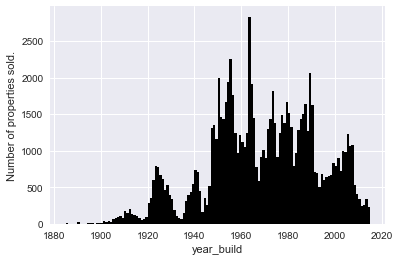

In [38]:
# the properties sold distribution in year
a=plt.hist(train_df['yearbuilt'],bins=130,normed=0,color='k')
plt.xlabel('year_build')
plt.ylabel('Number of properties sold.')
print('More sold properties are built during 1950-1990')
plt.savefig('number-sold-yearbuild.eps',bbox_inches='tight')

In [39]:
# add abs_logerror
train_df['abs_logerror']=train_df['logerror'].abs()

The Zestimate predicts between for recent years.  Compared to the mean log error, the mean log error shows more obvious relationship with year built.


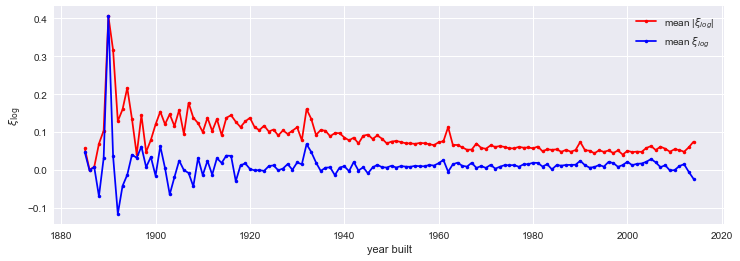

In [40]:
# relationship between log error and absolute log error 
plt.figure(figsize=(12,4))
plt.plot(range(1885,2015),train_df[['abs_logerror','yearbuilt']].groupby('yearbuilt').mean(),
         'r.-')
plt.plot(range(1885,2015),train_df[['logerror','yearbuilt']].groupby('yearbuilt').mean(),
         'b.-')
plt.xlabel('year built')
plt.ylabel(r'$\xi_{\log}$')
plt.legend([r'mean |$\xi_{log}$|',r'mean $\xi_{log}$'])
print('The Zestimate predicts between for recent years.  Compared to the mean log error,',
     'the mean log error shows more obvious relationship with year built.')
plt.savefig('total-error-yearbuilt.eps',bbox_inches='tight')

In [41]:
# the number of the properties sold in 2016 at different counties
# 037 las vegas 059 orange 111 ventura
train_df['fips'].value_counts()

6037.0    58574
6059.0    24505
6111.0     7196
0.0         536
Name: fips, dtype: int64

The trend is similar among three counties for properties built year 1950. For properties built before 1950, the log error all increases, but the increase is higher for Orange and Ventura. For the total mean log error, Zestimate has overpredicted the price for all three locations.


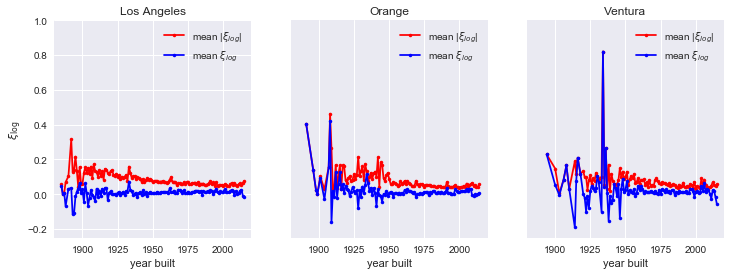

In [42]:
# check the relationship between log error and absolute log error at three counties
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
tmp=train_df[train_df['fips']==6037]
tmp1=tmp[['abs_logerror','yearbuilt']].groupby('yearbuilt').mean()
plt.plot(tmp1.index.tolist(),tmp1,'r.-')
tmp1=tmp[['logerror','yearbuilt']].groupby('yearbuilt').mean()
plt.plot(tmp1.index.tolist(),tmp1,'b.-')
plt.xlabel('year built')
plt.ylabel(r'$\xi_{\log}$')
plt.ylim([-0.25,1])
plt.xlim([1880,2020])
plt.title('Los Angeles')
plt.legend([r'mean |$\xi_{log}$|',r'mean $\xi_{log}$'])
plt.subplot(1,3,2)
plt.yticks([])
tmp=train_df[train_df['fips']==6059]
tmp1=tmp[['abs_logerror','yearbuilt']].groupby('yearbuilt').mean()
plt.plot(tmp1.index.tolist(),tmp1,'r.-')
tmp1=tmp[['logerror','yearbuilt']].groupby('yearbuilt').mean()
plt.plot(tmp1.index.tolist(),tmp1,'b.-')
plt.xlabel('year built')
plt.ylim([-0.25,1])
plt.xlim([1880,2020])
plt.title('Orange')
plt.legend([r'mean |$\xi_{log}$|',r'mean $\xi_{log}$'])
plt.subplot(1,3,3)
tmp=train_df[train_df['fips']==6111]
tmp1=tmp[['abs_logerror','yearbuilt']].groupby('yearbuilt').mean()
plt.plot(tmp1.index.tolist(),tmp1,'r.-')
plt.yticks([])
tmp1=tmp[['logerror','yearbuilt']].groupby('yearbuilt').mean()
plt.plot(tmp1.index.tolist(),tmp1,'b.-')
plt.xlabel('year built')
plt.ylim([-0.25,1])
plt.xlim([1880,2020])
plt.title('Ventura')
plt.legend([r'mean |$\xi_{log}$|',r'mean $\xi_{log}$'])
print("The trend is similar among three counties for properties built year 1950. For properties built before",
     "1950, the log error all increases, but the increase is higher for Orange and Ventura. For the total mean",
      "log error, Zestimate has overpredicted the price for all three locations.")
plt.savefig('diff-location-error-yearbuild.eps',bbox_inches='tight')

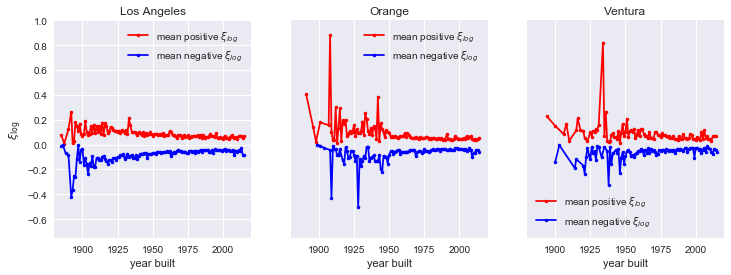

In [43]:
# check the relationship between positive and negative log error at three counties
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
tmp=train_df[train_df['fips']==6037]
tmp1=(tmp[tmp['logerror']>0])[['logerror','yearbuilt']].groupby('yearbuilt').mean()
plt.plot(tmp1.index.tolist(),tmp1,'r.-')
tmp1=(tmp[tmp['logerror']<=0])[['logerror','yearbuilt']].groupby('yearbuilt').mean()
plt.plot(tmp1.index.tolist(),tmp1,'b.-')
plt.xlabel('year built')
plt.ylabel(r'$\xi_{\log}$')
plt.ylim([-0.75,1])
plt.xlim([1880,2020])
plt.title('Los Angeles')
plt.legend([r'mean positive $\xi_{log}$',r'mean negative $\xi_{log}$'])
plt.subplot(1,3,2)
plt.yticks([])
tmp=train_df[train_df['fips']==6059]
tmp1=(tmp[tmp['logerror']>0])[['logerror','yearbuilt']].groupby('yearbuilt').mean()
plt.plot(tmp1.index.tolist(),tmp1,'r.-')
tmp1=(tmp[tmp['logerror']<=0])[['logerror','yearbuilt']].groupby('yearbuilt').mean()
plt.plot(tmp1.index.tolist(),tmp1,'b.-')
plt.xlabel('year built')
plt.ylim([-0.75,1])
plt.xlim([1880,2020])
plt.title('Orange')
plt.legend([r'mean positive $\xi_{log}$',r'mean negative $\xi_{log}$'])
plt.subplot(1,3,3)
plt.yticks([])
tmp=train_df[train_df['fips']==6111]
tmp1=(tmp[tmp['logerror']>0])[['logerror','yearbuilt']].groupby('yearbuilt').mean()
plt.plot(tmp1.index.tolist(),tmp1,'r.-')
tmp1=(tmp[tmp['logerror']<=0])[['logerror','yearbuilt']].groupby('yearbuilt').mean()
plt.plot(tmp1.index.tolist(),tmp1,'b.-')
plt.xlabel('year built')
plt.ylim([-0.75,1])
plt.xlim([1880,2020])
plt.title('Ventura')
plt.legend([r'mean positive $\xi_{log}$',r'mean negative $\xi_{log}$'])

In [44]:
# normalize
features=train_df.columns.tolist()
for x in features: #-set(dummy_feature)
    feature_max=train_df[x].max()
    feature_min=train_df[x].min()
    if(feature_max==feature_min):
        print(x,'max==min, cannot normalize, max=',feature_max)
        print('This feature only has one value, so will be dropped.')
        train_df.drop(x,axis=1,inplace=True)
    else:
        train_df[x]=(train_df[x]-feature_min)/(feature_max-feature_min)

poolcnt max==min, cannot normalize, max= 1.0
This feature only has one value, so will be dropped.
assessmentyear max==min, cannot normalize, max= 2015.0
This feature only has one value, so will be dropped.


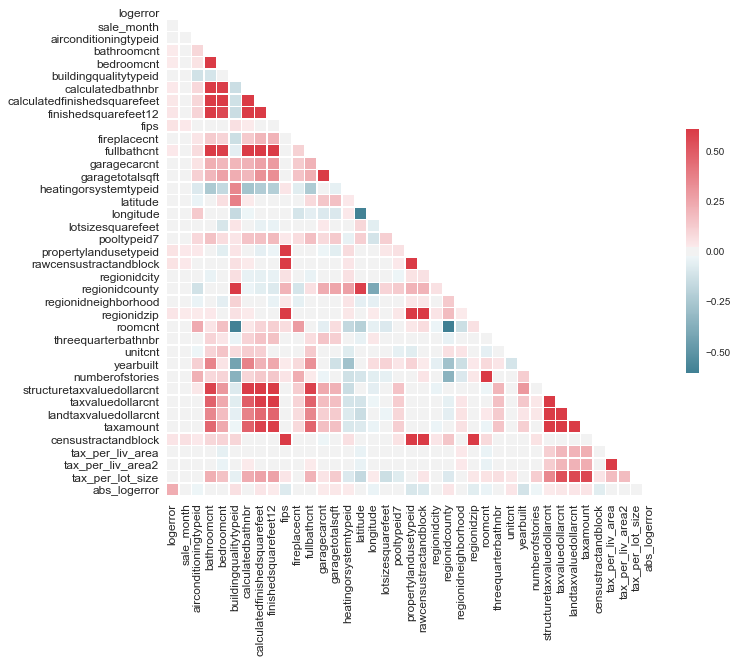

In [45]:
# correlation
plt.figure(figsize=(12,12))
sns.set(style="white")

# Compute the correlation matrix
corr = train_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Correlation coefficient of all variables in Train data')
plt.savefig('corr-train-data.eps',bbox_inches='tight')

In [46]:
corr.head(5)

,logerror,sale_month,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,tax_per_liv_area,tax_per_liv_area2,tax_per_lot_size,abs_logerror
logerror,1.000000,0.008033,0.006518,0.028513,0.025156,-0.000894,0.029537,0.037448,0.038510,0.051241,...,0.007587,0.021809,0.006664,-0.002747,-0.006214,0.047209,-0.013144,-0.012702,-0.019380,0.224626
sale_month,0.008033,1.000000,0.002656,0.004450,0.011147,0.014959,-0.002859,-0.005208,-0.004371,0.030853,...,0.000234,-0.004305,-0.005883,-0.007294,-0.014077,0.059491,-0.010402,-0.010786,-0.011453,-0.018746
airconditioningtypeid,0.006518,0.002656,1.000000,0.087664,0.050203,-0.121052,0.084423,0.087875,0.097020,0.023146,...,0.218279,0.037246,0.022538,0.011301,0.008575,0.029277,-0.015300,-0.015556,0.021201,-0.027648
bathroomcnt,0.028513,0.004450,0.087664,1.000000,0.646016,-0.108858,0.974326,0.756642,0.731530,0.021775,...,0.084157,0.581302,0.476358,0.353827,0.461927,0.086871,0.012791,0.023257,0.220938,-0.008062
bedroomcnt,0.025156,0.011147,0.050203,0.646016,1.000000,0.004954,0.600078,0.614864,0.560500,0.003161,...,0.095379,0.302018,0.241336,0.173213,0.239112,0.099323,-0.049189,-0.035955,0.158932,0.001039


The correlation coefficients indicate the possible important factors to predict log error.


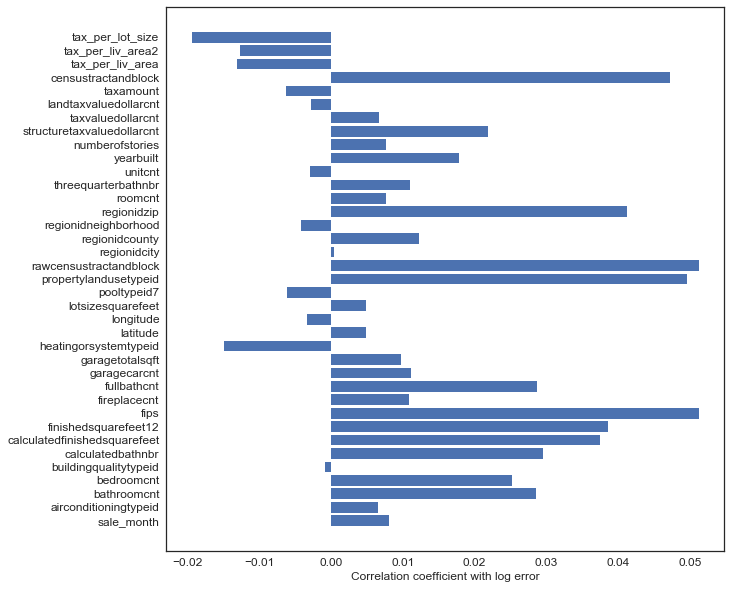

In [157]:
# correlation coefficient with log error of different features
ax=plt.figure(figsize=(10,10))
plt.barh(range(1,len(corr)-1),(corr['logerror'].values.tolist())[1:len(corr)-1])
plt.yticks(range(1,len(corr)-1), (corr.index.tolist())[1:len(corr)-1],fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('Correlation coefficient with log error',fontsize=12)
#plt.title('Correlation coefficient with log error of different features',fontsize=16)
print('The correlation coefficients indicate the possible important factors to predict log error.')
plt.savefig('corr-features-vs-error.eps',bbox_inches='tight')

In [90]:
#  7+12+3+14+15
#dummy_feature=['airconditioningtypeid','buildingqualitytypeid','fips','heatingorsystemtypeid',
#              'propertylandusetypeid']

In [91]:
# add dummy variables
#for x in dummy_feature:
#    if x in features:
#        a=pd.get_dummies(properties_2016[x])
#        print(x,'is transfer to dummy vector')
#        a.columns=[x+'_'+str(n) for n in a.columns.tolist()]
#        properties_2016=pd.concat([properties_2016,a], axis=1)
#print("new properties shape:",properties_2016.shape)

In [92]:
# drop dummy vector
#properties_2016.drop(dummy_feature,axis=1,inplace=True)

In [93]:
features=properties_2016.columns.tolist()
features.remove('parcelid')
for x in features:
    feature_max=properties_2016[x].max()
    feature_min=properties_2016[x].min()
    if(feature_max==feature_min):
        print(x,'max==min, cannot normalize, max=',feature_max)
        print('This feature only has one value, so will be dropped.')
        properties_2016.drop(x,axis=1,inplace=True)
    else:
        properties_2016[x]=(properties_2016[x]-feature_min)/(feature_max-feature_min)

poolcnt max==min, cannot normalize, max= 1.0
This feature only has one value, so will be dropped.


In [98]:
# generate new train_df
train_df=transaction.merge(properties_2016,on='parcelid',how='left')
train_df.set_index('parcelid',inplace=True)

In [104]:
# get X_train y_train
X_train=train_df.iloc[:,1:]
#X_train.set_index('parcelid',inplace=True)
y_train=train_df['logerror']
print('X_train:',X_train.shape)

X_train: (90811, 38)


In [101]:
train_df.head()

,logerror,sale_month,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,tax_per_liv_area,tax_per_liv_area2,tax_per_lot_size
parcelid,,,,,,,,,,,,,,,,,,,,,
11016594,0.0276,1,0.076923,0.100,0.15,0.333333,0.052632,0.001767,0.005797,0.987891,...,0.000,0.000488,0.001274,0.9375,0.002631,0.001947,1.249841e-01,0.000336,0.000336,0.005904
14366692,-0.1684,1,0.000000,0.175,0.20,0.000000,0.131579,0.002375,0.007791,0.991491,...,0.000,0.001378,0.002071,0.9375,0.002649,0.002935,2.070264e-15,0.000377,0.000377,0.018390
12098116,-0.0040,1,0.076923,0.150,0.10,0.333333,0.105263,0.002326,0.007632,0.987891,...,0.000,0.000247,0.000424,0.9375,0.000642,0.003320,1.249915e-01,0.000435,0.000435,0.006634
12643413,0.0218,1,0.076923,0.100,0.10,0.333333,0.052632,0.000880,0.002886,0.987891,...,0.000,0.000682,0.000866,0.9375,0.000813,0.000881,1.249880e-01,0.000305,0.000305,0.000284
14432541,-0.0050,1,0.000000,0.125,0.20,0.000000,0.078947,0.002396,0.007860,0.991491,...,0.025,0.000674,0.001537,0.9375,0.002936,0.001587,1.254382e-01,0.000202,0.000202,0.006036


In [102]:
X_train.columns.tolist()

['sale_month',
 'airconditioningtypeid',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'pooltypeid7',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'threequarterbathnbr',
 'unitcnt',
 'yearbuilt',
 'numberofstories',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'tax_per_liv_area',
 'tax_per_liv_area2',
 'tax_per_lot_size']

In [103]:
# generate X_test
# load sample submission for output
sample = pd.read_csv('sample_submission.csv')
sample['parcelid'] = sample['ParcelId']
df_test = sample.merge(properties_2016, on='parcelid', how='left')
# still need the sale month as input
train_feature=properties_2016.columns.tolist()
X_test=df_test[train_feature]
X_test.set_index('parcelid',inplace=True)
# predict with linear regress
X_test['sale_month']=10/12
X_test=X_test[X_train.columns.tolist()]
X_test.head(5)

/Users/zyaj/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,sale_month,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,...,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,tax_per_liv_area,tax_per_liv_area2,tax_per_lot_size
parcelid,,,,,,,,,,,,,,,,,,,,,
10754147,0.833333,0.0,0.0,0.0,0.000000,0.052632,0.001917,0.006058,0.987891,0.0,...,0.0,0.000679,2.828994e-08,0.9375,8.864637e-08,0.001554,2.070264e-15,0.000247,0.000256,0.000414
10759547,0.833333,0.0,0.0,0.0,0.000000,0.052632,0.001917,0.006058,0.987891,0.0,...,0.0,0.000679,9.729973e-05,0.9375,3.048881e-04,0.001554,2.070264e-15,0.000247,0.000256,0.008690
10843547,0.833333,0.0,0.0,0.0,0.000000,0.052632,0.076661,0.006058,0.987891,0.0,...,0.0,0.002588,4.998076e-03,0.9375,8.450548e-03,0.006013,2.070264e-15,0.000024,0.000992,0.002176
10859147,0.833333,0.0,0.0,0.0,0.583333,0.052632,0.005319,0.006058,0.987891,0.0,...,0.0,0.002272,4.090843e-03,0.9375,6.487662e-03,0.004208,2.070264e-15,0.000241,0.000694,0.012772
10879947,0.833333,0.0,0.0,0.0,0.000000,0.052632,0.001863,0.006058,0.987891,0.0,...,0.0,0.000771,1.532926e-03,0.9375,2.656000e-03,0.001655,2.070264e-15,0.000271,0.000273,0.004438


In [105]:
# save train and X_test
train_df.to_csv('train_df_normal.csv')
print('finish save train data')
X_test.to_csv('X_test.csv')
print('finish save X_test')

finish save train data
finish save X_test


In [108]:
# check point
## Check point
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
from scipy.stats import norm

# predict log error with the training set
# train/test set split
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

# regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor 
%matplotlib inline
X_test=pd.read_csv('X_test.csv')
X_test.set_index('parcelid',inplace=True)
train_df=pd.read_csv('train_df_normal.csv')
train_df.set_index('parcelid',inplace=True)
X_train=train_df.iloc[:,1:]
y_train=train_df['logerror']
print('finish load data')

finish load data


In [138]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    #score = r2_score(y_true,y_predict)
    score=-mean_absolute_error(y_true,y_predict)
    # Return the score
    return score

def fit_model(X, y,regressor,params):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits = 5, test_size = 0.20, random_state = 50)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(mean_absolute_error)

    # TODO: Create the grid search object
    grid = GridSearchCV(estimator=regressor,param_grid=params,scoring='neg_mean_absolute_error',cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid

def plot_cv_results(results,params):
    time=results['mean_fit_time'];
    score_time=results['mean_score_time'];
    test_score=results['mean_test_score']
    print(list(params.values()))
    train_score=results['mean_train_score']
    ax=plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(list(params.values())[0],test_score,'r.-')
    plt.plot(list(params.values())[0],train_score,'k.-')
    plt.xlabel(list(params.keys())[0])
    plt.ylabel('score')
    plt.subplot(1,2,2)
    plt.plot(list(params.values())[0],time,'k.-')
    plt.plot(list(params.values())[0],score_time,'r.-')
    plt.xlabel(list(params.keys())[0])
    plt.ylabel('time (s)')
    
# define output function
def output_results(output,X_test,model,filename,switch):
    for mon in [10,11,12]:
        X_test['sale_month']=mon/12;
        output['2016'+str(mon)]=model.predict(X_test)
    # output csv
    #output.set_index('ParcelId',inplace=True)
    if switch==1:
        output.to_csv(filename,float_format='%.4f')
    print('finish output file:',filename)
    return output

In [110]:
## optimize linear regression
# linear regression
# linear_reg=LinearRegression()
params={'alpha':[0.001,0.002,0.003,0.004,0.005,0.01,0.02,0.03,0.05,0.1]}
linear_reg=fit_model(X_train,y_train,Ridge(random_state=50),params)

[[0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]]


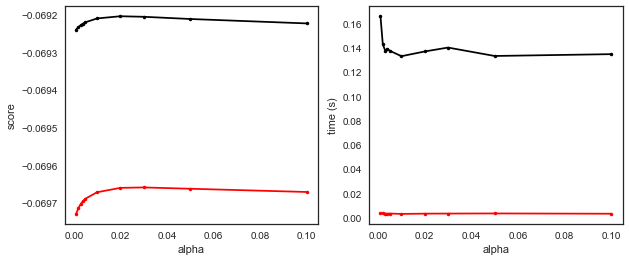

In [140]:
# plot fit results
params={'alpha':[0.001,0.002,0.003,0.004,0.005,0.01,0.02,0.03,0.05,0.1]}
results=linear_reg.cv_results_
plot_cv_results(results,params)
plt.savefig('linear_regression_opt.eps',bbox_inches='tight')

In [12]:
# output results
# prepare the outpu date frame
output=pd.read_csv('sample_submission.csv')
output.set_index('ParcelId',inplace=True)
# predict with linear regression
output_results(output,X_test,linear_reg.best_estimator_,'linear_reg.csv',1)
print("finish linear regression output")

finish output file: linear_reg.csv
finish linear regression output


In [116]:
# optimize decision tree
params={'max_depth':list(range(1,10))}
decision_tree_reg = fit_model(X_train,y_train,DecisionTreeRegressor(random_state=50),params)

[[1, 2, 3, 4, 5, 6, 7, 8, 9]]


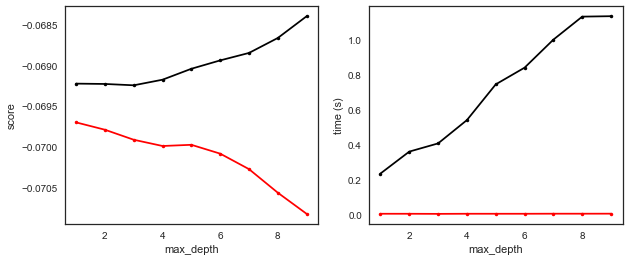

In [141]:
# plot fit results
params={'max_depth':list(range(1,10))}
results=decision_tree_reg.cv_results_
plot_cv_results(results,params)
plt.savefig('decision_tree_opt.eps',bbox_inches='tight')

In [5]:
# output results
# prepare the outpu date frame
output=pd.read_csv('sample_submission.csv')
output.set_index('ParcelId',inplace=True)
# predict decision tree
output_results(output,X_test,decision_tree_reg.best_estimator_,'decision_tree_reg.csv',1)
print("finish decision_tree output")

finish output file: decision_tree_reg.csv
finish decision_tree output


In [114]:
# optimize random forest
params={'max_depth':list(range(1,10))}
random_forest_reg= fit_model(X_train,y_train,RandomForestRegressor(random_state=50,n_estimators=50,n_jobs=2),params)

[[1, 2, 3, 4, 5, 6, 7, 8, 9]]


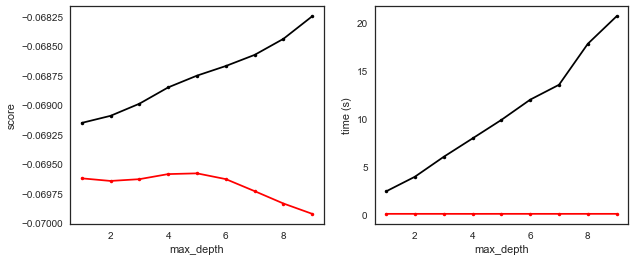

In [142]:
# plot fit results
params={'max_depth':list(range(1,10))}
results=random_forest_reg.cv_results_
plot_cv_results(results,params)
plt.savefig('random_forest_opt.eps',bbox_inches='tight')

In [9]:
# output results
# prepare the outpu date frame
output=pd.read_csv('sample_submission.csv')
output.set_index('ParcelId',inplace=True)
# predict random forest
output_results(output,X_test,random_forest_reg.best_estimator_,'random_forest_reg.csv',1)
print("finish random_forest output")

finish output file: random_forest_reg.csv
finish random_forest output


The importance of different features to predict log error.


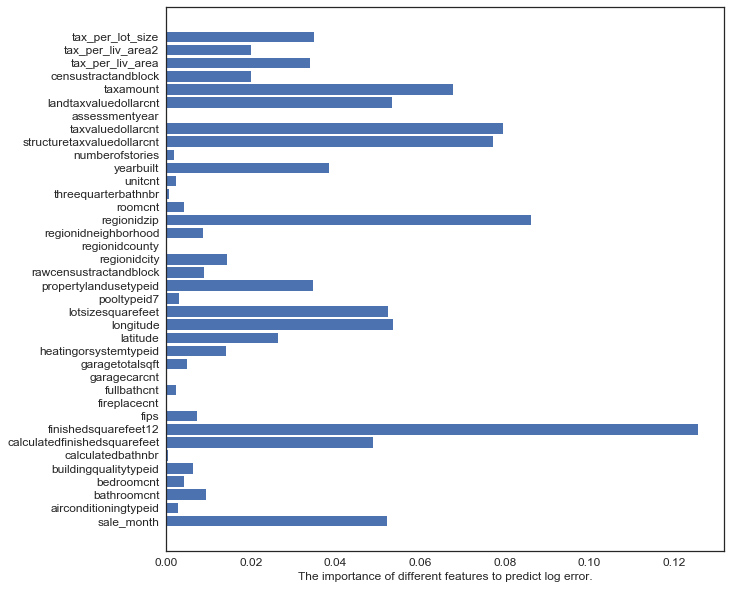

In [188]:
# plot feature importance
feature_importance=random_forest_reg.best_estimator_.feature_importances_

# correlation coefficient with log error of different features
ax=plt.figure(figsize=(10,10))
plt.barh(range(38),feature_importance)
plt.yticks(range(38), X_train.columns.tolist(),fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('The importance of different features to predict log error.',fontsize=12)
#plt.title('Correlation coefficient with log error of different features',fontsize=16)
print('The importance of different features to predict log error.')
plt.savefig('feature_importance.eps',bbox_inches='tight')

In [155]:
len(X_train.columns.tolist())

38

In [128]:
# optimize knn
params={'n_neighbors':[4,8,12,16,20]}
knn_reg= fit_model(X_train,y_train,KNeighborsRegressor(n_jobs=2),params)

[[4, 8, 12, 16, 20]]


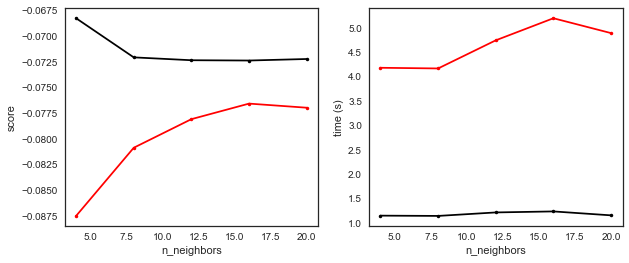

In [143]:
# plot fit results
params={'n_neighbors':[4,8,12,16,20]}
results=knn_reg.cv_results_
plot_cv_results(results,params)
plt.savefig('knn_opt.eps',bbox_inches='tight')

In [21]:
# output results
# prepare the outpu date frame
output=pd.read_csv('sample_submission.csv')
output.set_index('ParcelId',inplace=True)
# predict random forest
output_results(output,X_test,knn_reg.best_estimator_,'knn_reg.csv',1)
print("finish knn output")

In [136]:
## save model
from sklearn.externals import joblib
joblib.dump(linear_reg, 'linear_reg_normal.pkl') 
joblib.dump(decision_tree_reg, 'decision_tree_reg_normal.pkl') 
joblib.dump(knn_reg, 'knn_reg_normal.pkl') 
joblib.dump(random_forest_reg, 'random_forest_normal.pkl') 

['random_forest_normal.pkl']

In [19]:
# load model and fit
#from sklearn.externals import joblib
#linear_reg=joblib.load('linear_reg_normal.pkl') 
#reg_decision_tree=joblib.load('decision_tree_reg_normal.pkl') 
#knn_reg=joblib.load('knn_reg_normal.pkl') 
#ada_reg=joblib.load('ada_reg_normal.pkl') 
#random_forest_reg=joblib.load('random_forest_normal.pkl') 
#linear_reg.fit(X_train,y_train)
#print('finish linear regression')
#reg_decision_tree.best_estimator_.fit(X_train,y_train)
#print('finish decision tree')
#knn_reg.fit(X_train,y_train)
#print('finish knn')
#ada_reg.fit(X_train,y_train)
#print('finish ada boosting')
#random_forest_reg.best_estimator_.fit(X_train,y_train)
#print('finish random forest')

finish linear regression
finish decision tree
finish knn
finish ada boosting
finish random forest


In [137]:
# calculate performance metric for all five models
y_predict=linear_reg.best_estimator_.predict(X_train)
print('linear regression: ', mean_absolute_error(y_predict,y_train))
y_predict=decision_tree_reg.best_estimator_.predict(X_train)
print('decision tree: ', mean_absolute_error(y_predict,y_train))
y_predict=knn_reg.best_estimator_.predict(X_train)
print('k nearest neighbour: ', mean_absolute_error(y_predict,y_train))
#y_predict=ada_reg.predict(X_train)
#print('ada boosting: ', mean_absolute_error(y_predict,y_train))
y_predict=random_forest_reg.best_estimator_.predict(X_train)
print('random forest: ', mean_absolute_error(y_predict,y_train))

linear regression:  0.0692758589775
decision tree:  0.0693047143577
k nearest neighbour:  0.0720146467388
random forest:  0.0688313016709


In [50]:
np.mean(abs(y_train-y_train.median()))

0.06901750448734861

[[0.008, 0.012, 0.016, 0.02]]


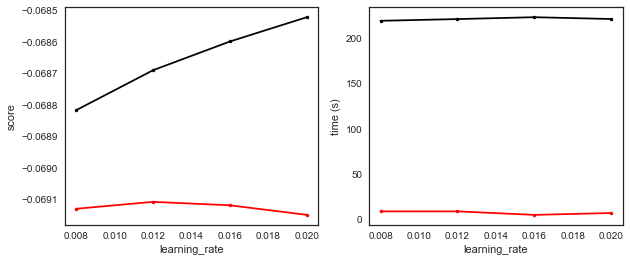

In [164]:
# gridsearchcv results for learning rate of lightgbm
light_gbm_lr_cv_results={'split0_test_score': np.array([-0.07356084, -0.07350209, -0.07348418, -0.07348774]), 
 'split1_test_score': np.array([-0.06740119, -0.06741161, -0.06744009, -0.0674886 ]), 
 'split2_test_score': np.array([-0.0664278 , -0.06641023, -0.06643247, -0.06647165]), 
 'mean_test_score': np.array([-0.06912999, -0.06910803, -0.06911896, -0.06914938]), 
 'std_test_score': np.array([ 0.00315823,  0.0031339 ,  0.00311401,  0.0030957 ]), 
 'rank_test_score': np.array([3, 1, 2, 4], dtype=np.int32), 
 'split0_train_score': np.array([-0.06655967, -0.06644191, -0.06636603, -0.06628521]), 
 'split1_train_score': np.array([-0.06996914, -0.06986604, -0.06979102, -0.06973722]), 
 'split2_train_score': np.array([-0.06992129, -0.06976146, -0.06963857, -0.06954174]), 
 'mean_train_score': np.array([-0.0688167 , -0.0686898 , -0.06859854, -0.06852139]), 
 'std_train_score': np.array([ 0.00159608,  0.00159007,  0.00157985,  0.00158323]), 
 'mean_fit_time': np.array([ 219.51130382,  221.41814049,  223.48714399,  221.4878931 ]), 
 'std_fit_time': np.array([ 17.7584018 ,   9.16827745,   4.71680123,   5.5057297 ]), 
 'mean_score_time': np.array([ 9.0138859 ,  8.99046206,  5.13893859,  7.16927417]), 
 'std_score_time': np.array([ 7.81742198,  5.74577804,  3.37896478,  2.62427975]), 
 'param_learning_rate': np.array([0.008,0.012,0.016,0.02])}
params={'learning_rate':[0.008,0.012,0.016,0.02]}
plot_cv_results(light_gbm_lr_cv_results,params)
plt.savefig('lightgbm_lr_opt.eps',bbox_inches='tight')

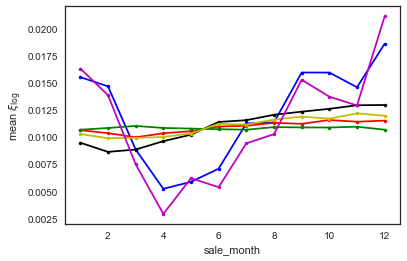

In [187]:
# compare monthly average log error to validate model
train_df=pd.read_csv('lightgbm_train_output.csv')
train_df['sale_month']=train_df['sale_month']*12
plt.plot(train_df[['logerror','sale_month']].groupby('sale_month').mean(),'b.-')
plt.plot(train_df[['logerror_predict','sale_month']].groupby('sale_month').mean(),'r.-')
train_df['logerror_predict']=linear_reg.best_estimator_.predict(X_train)
plt.plot(train_df[['logerror_predict','sale_month']].groupby('sale_month').mean(),'k.-')
train_df['logerror_predict']=decision_tree_reg.best_estimator_.predict(X_train)
plt.plot(train_df[['logerror_predict','sale_month']].groupby('sale_month').mean(),'g.-')
train_df['logerror_predict']=random_forest_reg.best_estimator_.predict(X_train)
plt.plot(train_df[['logerror_predict','sale_month']].groupby('sale_month').mean(),'y.-')
train_df['logerror_predict']=knn_reg.best_estimator_.predict(X_train)
plt.plot(train_df[['logerror_predict','sale_month']].groupby('sale_month').mean(),'m.-')
plt.xlabel('sale_month')
plt.ylabel(r'mean $\xi_{\log}$')
plt.savefig('monthly-average-error-prediction.eps',bbox_inches='tight')